<a href="https://colab.research.google.com/github/AlbionKransiqi/Data-driven-research/blob/main/%5BAlbion%5D_Data_Driven_Exploration_NS125_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
## loading necessary libraries
library(readxl)
library(tidyverse)
library(ggplot2)
library(corrgram)
library(tidyverse)
library(usmap)

In [5]:
## reading HoYale Climate Opinion 2020 data
url = "https://raw.githubusercontent.com/AlbionKransiqi/Data-driven-research/main/YCOM6.0_2021_Data_%20(1).csv"
data = read.csv(url)
head(data)

,GeoType,GEOID,GeoName,TotalPop,happening,happeningOppose,human,humanOppose,consensus,consensusOppose,⋯,localofficials,localofficialsOppose,citizens,citizensOppose,discuss,discussOppose,mediaweekly,mediaweeklyOppose,priority,priorityOppose
,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,National,9999,US,251268391,71.827,14.459,56.540,30.367,57.303,23.389,⋯,58.752,16.373,64.899,11.981,35.447,64.041,32.722,65.987,55.257,23.707
2,State,1,Alabama,3779877,63.291,17.818,49.350,36.640,47.468,26.865,⋯,54.742,16.873,59.194,13.723,27.300,72.726,25.779,73.339,47.646,29.602
3,State,2,Alaska,552673,70.188,17.444,53.277,33.621,56.628,26.673,⋯,55.131,17.868,63.117,11.010,39.192,59.980,35.095,63.939,50.147,27.587
4,State,4,Arizona,5414955,72.246,15.191,56.428,30.939,57.135,24.560,⋯,57.356,17.500,63.935,12.103,37.305,62.536,35.705,63.332,55.122,26.676
5,State,5,Arkansas,2295104,66.366,18.109,51.238,35.455,48.541,27.555,⋯,54.652,17.396,60.609,13.029,29.337,70.436,26.537,72.519,47.375,29.015
6,State,6,California,30261354,77.466,10.708,63.349,25.064,63.498,19.547,⋯,61.893,16.243,69.011,10.978,42.648,57.208,37.013,61.839,63.704,19.064


In [6]:
## reading 2020's election data
url = 'https://raw.githubusercontent.com/AlbionKransiqi/Data-driven-research/main/us_election_data_by_county.csv'
election_data = read.csv(url)
head(election_data)

,county,total_votes,rep_votes,dem_votes,rep_percentage,dem_percentage,Party
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,"Abbeville County, South Carolina",12433,8215,4101,0.6607416,0.3298480,0
2,"Abbot, Maine",417,288,121,0.6906475,0.2901679,0
3,"Abington, Massachusetts",9660,4236,5209,0.4385093,0.5392340,1
4,"Acadia Parish, Louisiana",28425,22596,5443,0.7949340,0.1914864,0
5,"Accomack County, Virginia",16962,9172,7578,0.5407381,0.4467634,0
6,"Acton, Maine",1636,930,651,0.5684597,0.3979218,0


In [7]:
## filtering the climate data (keeping only data for counties and more relevant variables)
state_data = data %>%
    filter(GeoType == 'County') %>%
    select(GeoName, discuss, worried, happening, timing)

## changing names of columns that are keeping county names (we will join 
## the datasets on the col)
names(state_data)[names(state_data) == 'GeoName'] <- 'county'
names(election_data)[names(election_data) == 'state'] <- 'county'

head(state_data)

,county,discuss,worried,happening,timing
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Autauga County, Alabama",26.016,52.323,59.187,49.131
2,"Baldwin County, Alabama",27.387,53.320,60.461,47.112
3,"Barbour County, Alabama",26.129,61.239,68.059,59.202
4,"Bibb County, Alabama",22.188,49.509,57.593,48.133
5,"Blount County, Alabama",22.754,46.265,52.504,43.273
6,"Bullock County, Alabama",27.109,67.123,73.111,65.586


In [8]:
## merge two data frames by county names
merged_data <- merge(election_data, state_data, by="county")
head(merged_data)

,county,total_votes,rep_votes,dem_votes,rep_percentage,dem_percentage,Party,discuss,worried,happening,timing
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Abbeville County, South Carolina",12433,8215,4101,0.6607416,0.3298480,0,29.455,58.678,67.171,55.883
2,"Acadia Parish, Louisiana",28425,22596,5443,0.7949340,0.1914864,0,24.804,53.169,59.617,49.891
3,"Accomack County, Virginia",16962,9172,7578,0.5407381,0.4467634,0,32.543,63.403,70.263,59.264
4,"Ada County, Idaho",259389,130699,120539,0.5038726,0.4647036,0,37.475,63.441,71.985,55.744
5,"Adair County, Iowa",4177,2917,1198,0.6983481,0.2868087,0,29.885,54.471,62.550,49.554
6,"Adair County, Kentucky",8768,7276,1392,0.8298358,0.1587591,0,24.323,48.465,59.483,45.886


Coorelation Plots

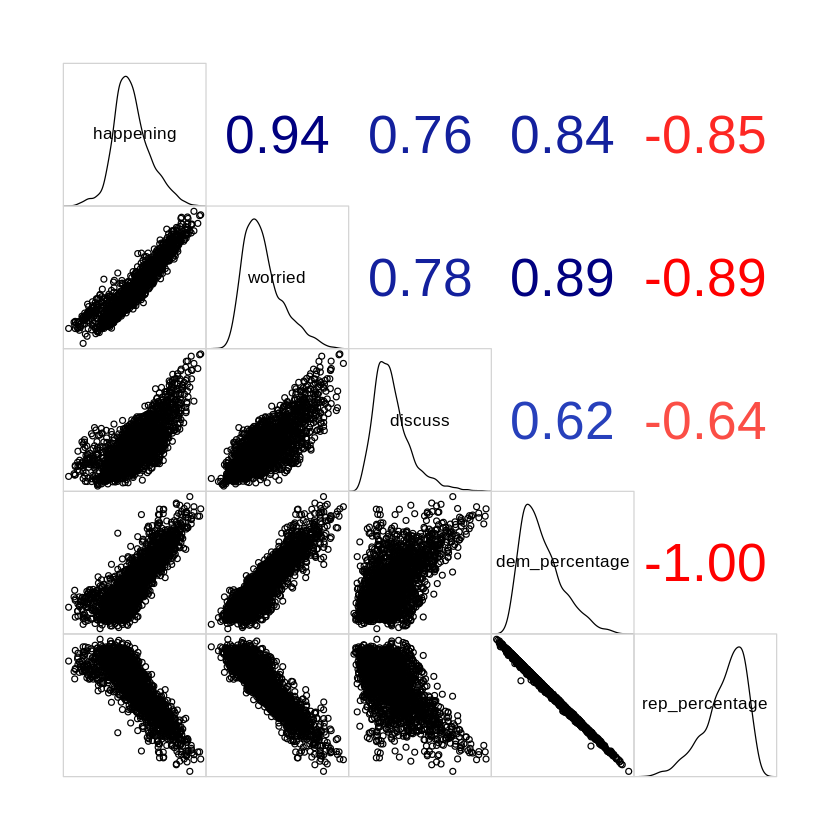

In [9]:
## choosing some columns to see their correlation
columns = c('happening','worried','discuss',
            'dem_percentage','rep_percentage')

## plotting a corrgram to see how variables correlate with each other
corrgram(merged_data[,columns],
        lower.panel=panel.pts, upper.panel=panel.cor,
         diag.panel=panel.density)

**Data Exploration**

**Happening**

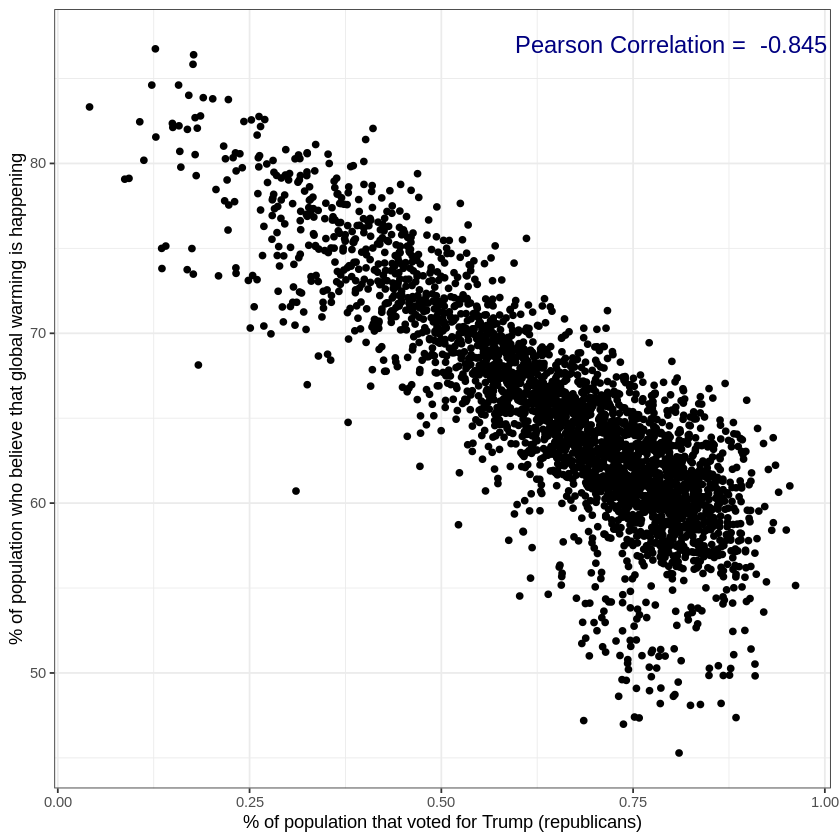

In [10]:
#Specifying correlation formula
my.formula <- y ~ x

#Plotting scatter plot of election results (Percentage that voted for Trump per state)
#against population who believe that global warming is happening
ggplot(data = merged_data, 
       mapping = aes(x = rep_percentage, y = happening)) +
  geom_point() + theme_bw() + 
  #geom_smooth(method = "lm", se = FALSE) +
  annotate(x=0.8, y=87, 
         label=paste("Pearson Correlation = ", round(cor(merged_data$rep_percentage, merged_data$happening),3)), 
         geom="text", col = 'navyblue', size=5) + 
  labs(x = "% of population that voted for Trump (republicans)", 
       y = "% of population who believe that global warming is happening")

In [ ]:
## just seeing if in a regression model there is a significant 
## impact of rep_percentage on happening
model <- lm(worried ~ rep_percentage, data = merged_data)
summary(model)


Call:
lm(formula = worried ~ rep_percentage, data = merged_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6810 -2.0121 -0.3159  1.6773 13.9193 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     81.0503     0.2256   359.3   <2e-16 ***
rep_percentage -35.9935     0.3346  -107.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.917 on 3042 degrees of freedom
Multiple R-squared:  0.7918,	Adjusted R-squared:  0.7917 
F-statistic: 1.157e+04 on 1 and 3042 DF,  p-value: < 2.2e-16


**Extra Exploration**

$x
[1] "% of population that voted for Trump (republicans)"

$y
[1] "% of population who discuss that global warming"

attr(,"class")
[1] "labels"

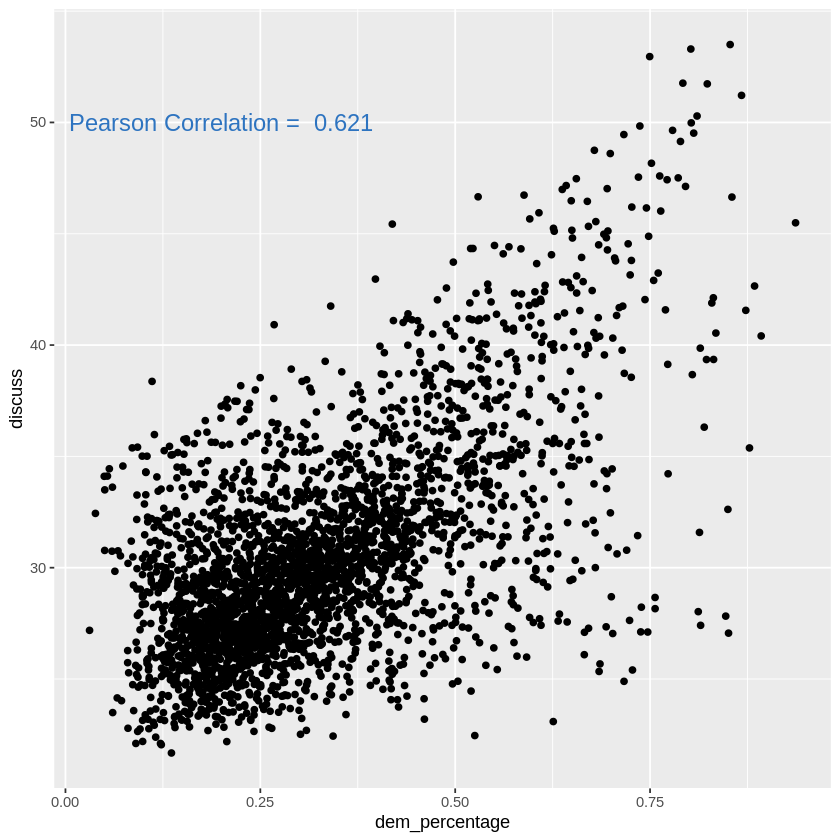

In [12]:
#Specifying correlation formula
my.formula <- y ~ x

#Plotting scatter plot of election results (Percentage that voted for Trump per state)
#against percentage of population who discuss that global warming
ggplot(data = merged_data, 
       mapping = aes(x = dem_percentage, y = discuss)) +
  geom_point() +
  #geom_smooth(method = "lm", se = FALSE) +
  annotate(x=0.2, y=50, 
         label=paste("Pearson Correlation = ", round(cor(merged_data$dem_percentage, merged_data$discuss),3)), 
         geom="text", col = '#2E74C0', size=5)
  labs(x = "% of population that voted for Trump (republicans)", 
       y = "% of population who discuss that global warming")

**State Level Data**

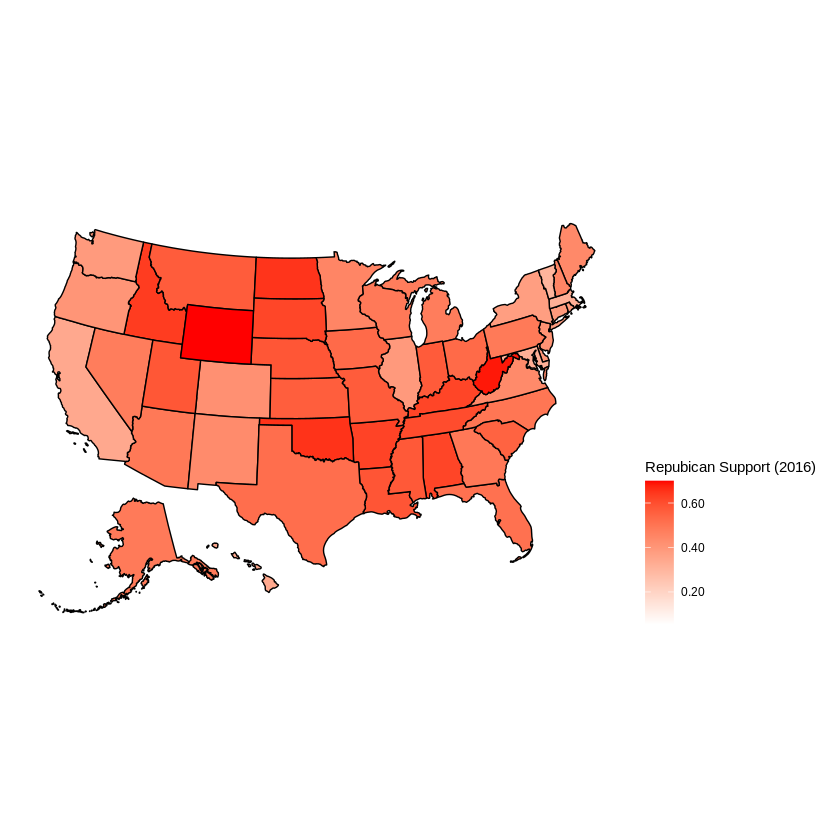

In [ ]:
## reading the data
url = "https://course-resources.minerva.edu/uploaded_files/mke/Y6azen/howe-2016-data.csv"
data = read.csv(url)

url = 'https://raw.githubusercontent.com/AlbionKransiqi/Manhattan_Data/main/us_election_data.csv'
election_data = read.csv(url)

## filtering the climate data 
state_data = data %>%
    filter(GeoType == 'State') %>%
    select(GeoName, discuss, worried, happening, timing)

## updating the names of columns
names(state_data)[names(state_data) == 'GeoName'] <- 'state'

# merge two data frames by state
merged_data <- merge(election_data, state_data, by="state")


## plotting us map displaying Trump's support
plot_usmap(data = merged_data, values = "rep_percentage", color = "black") + 
  scale_fill_continuous(
    low = "white", high = "red", name = "Repubican Support (2016)", label = scales::comma
  ) + theme(legend.position = "right")